In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import dill
from pathlib import Path
from tqdm.notebook import trange, tqdm
sys.path.append("edm")
from bridge_matching.model import BridgeMatchingModel
from bridge_matching.dataset import FFHQDataset, ColoredMNIST
from bridge_matching.transform import InpaintingTransform
from bridge_matching.utils import tensor_to_image

In [12]:
image_res = 64
image = torch.ones((3, image_res, image_res))

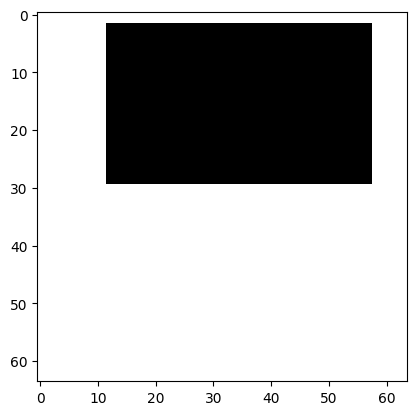

In [22]:
width, height = torch.randint(
    low=image_res // 4, high=3 * image_res // 4 + 1, size=(2,)
)
x, y = torch.randint(low=0, high=image_res // 2, size=(2,))
masked_image = image.clone()
masked_image[..., y: y + height, x: x + width] = 0
plt.imshow(masked_image.permute(1, 2, 0))

In [19]:
payload = torch.load(Path("checkpoints/latest.ckpt").open("rb"), pickle_module=dill)

In [22]:
stats = np.load("stats/colored_mnist.npy", allow_pickle=True)

In [26]:
stats

array({'mu': array([0.15158547, 0.25472192, 0.01582665, ..., 0.18728159, 0.0502126 ,
       1.18695337]), 'sigma': array([[ 1.83320561e-02, -2.14944223e-03,  2.39986244e-05, ...,
         4.97496159e-03, -2.30881315e-03,  4.38426568e-03],
       [-2.14944223e-03,  2.56954442e-02, -6.41558407e-04, ...,
         3.95599154e-04,  7.95539951e-04,  8.54977005e-03],
       [ 2.39986244e-05, -6.41558407e-04,  3.89301215e-04, ...,
        -1.69462841e-04,  9.11439073e-05, -8.07595005e-04],
       ...,
       [ 4.97496159e-03,  3.95599154e-04, -1.69462841e-04, ...,
         2.54067091e-02, -3.02638215e-04,  3.94316402e-03],
       [-2.30881315e-03,  7.95539951e-04,  9.11439073e-05, ...,
        -3.02638215e-04,  4.53903057e-03, -3.45838365e-03],
       [ 4.38426568e-03,  8.54977005e-03, -8.07595005e-04, ...,
         3.94316402e-03, -3.45838365e-03,  1.03517942e-01]])},
      dtype=object)

In [23]:
#dataset = FFHQDataset("datasets/ffhq/train")
dataset = ColoredMNIST(root="datasets/colored_mnist", train=False, download=True)

In [15]:
for i in trange(len(dataset)):
    tensor_to_image(dataset[i]).save(f"datasets/colored_mnist/test_images/{i + 1}.png")

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
from bridge_matching.metric.fid import calculate_inception_stats

In [16]:
len(dataset)

10000

In [17]:
mu, sigma = calculate_inception_stats(
    "datasets/colored_mnist/test_images", num_expected=10000, max_batch_size=32
)
result_dict = {"mu": mu, "sigma": sigma}
print(result_dict)

Loading Inception-v3 model...


/home/jovyan/shares/SR003.nfs2/micromamba/envs/kkorolev/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io

Loading images from "datasets/colored_mnist/test_images"...
Calculating statistics for 10000 images...


100%|██████████| 313/313 [00:09<00:00, 31.30batch/s]

{'mu': array([0.15158547, 0.25472192, 0.01582665, ..., 0.18728159, 0.0502126 ,
       1.18695337]), 'sigma': array([[ 1.83320561e-02, -2.14944223e-03,  2.39986244e-05, ...,
         4.97496159e-03, -2.30881315e-03,  4.38426568e-03],
       [-2.14944223e-03,  2.56954442e-02, -6.41558407e-04, ...,
         3.95599154e-04,  7.95539951e-04,  8.54977005e-03],
       [ 2.39986244e-05, -6.41558407e-04,  3.89301215e-04, ...,
        -1.69462841e-04,  9.11439073e-05, -8.07595005e-04],
       ...,
       [ 4.97496159e-03,  3.95599154e-04, -1.69462841e-04, ...,
         2.54067091e-02, -3.02638215e-04,  3.94316402e-03],
       [-2.30881315e-03,  7.95539951e-04,  9.11439073e-05, ...,
        -3.02638215e-04,  4.53903057e-03, -3.45838365e-03],
       [ 4.38426568e-03,  8.54977005e-03, -8.07595005e-04, ...,
         3.94316402e-03, -3.45838365e-03,  1.03517942e-01]])}


In [27]:
import pickle

In [29]:
with open("stats/colored_mnist", "wb") as f:
    pickle.dump(result_dict, f)

In [30]:
with open("stats/colored_mnist", "rb") as f:
    print(pickle.load(f))

{'mu': array([0.15158547, 0.25472192, 0.01582665, ..., 0.18728159, 0.0502126 ,
       1.18695337]), 'sigma': array([[ 1.83320561e-02, -2.14944223e-03,  2.39986244e-05, ...,
         4.97496159e-03, -2.30881315e-03,  4.38426568e-03],
       [-2.14944223e-03,  2.56954442e-02, -6.41558407e-04, ...,
         3.95599154e-04,  7.95539951e-04,  8.54977005e-03],
       [ 2.39986244e-05, -6.41558407e-04,  3.89301215e-04, ...,
        -1.69462841e-04,  9.11439073e-05, -8.07595005e-04],
       ...,
       [ 4.97496159e-03,  3.95599154e-04, -1.69462841e-04, ...,
         2.54067091e-02, -3.02638215e-04,  3.94316402e-03],
       [-2.30881315e-03,  7.95539951e-04,  9.11439073e-05, ...,
        -3.02638215e-04,  4.53903057e-03, -3.45838365e-03],
       [ 4.38426568e-03,  8.54977005e-03, -8.07595005e-04, ...,
         3.94316402e-03, -3.45838365e-03,  1.03517942e-01]])}


In [4]:
device = "cuda:0"

In [38]:
state_dict = payload["state_dicts"]["model"]
new_state_dict = {}
for key in state_dict.keys():
    if key.startswith("module"):
        new_state_dict[key[7:]] = state_dict[key]
state_dict = new_state_dict

In [39]:
model = BridgeMatchingModel().to(device)
model.load_state_dict(state_dict)
model.eval()

BridgeMatchingModel(
  (model): SongUNet(
    (map_noise): PositionalEmbedding()
    (map_layer0): Linear()
    (map_layer1): Linear()
    (enc): ModuleDict(
      (64x64_conv): Conv2d()
      (64x64_block0): UNetBlock(
        (norm0): GroupNorm()
        (conv0): Conv2d()
        (affine): Linear()
        (norm1): GroupNorm()
        (conv1): Conv2d()
      )
      (64x64_block1): UNetBlock(
        (norm0): GroupNorm()
        (conv0): Conv2d()
        (affine): Linear()
        (norm1): GroupNorm()
        (conv1): Conv2d()
      )
      (64x64_block2): UNetBlock(
        (norm0): GroupNorm()
        (conv0): Conv2d()
        (affine): Linear()
        (norm1): GroupNorm()
        (conv1): Conv2d()
      )
      (64x64_block3): UNetBlock(
        (norm0): GroupNorm()
        (conv0): Conv2d()
        (affine): Linear()
        (norm1): GroupNorm()
        (conv1): Conv2d()
      )
      (32x32_down): UNetBlock(
        (norm0): GroupNorm()
        (conv0): Conv2d()
        (affine

In [43]:
x_orig = dataset[0].cuda()
x_trans = InpaintingTransform()(x_orig)
t = 0.5
x_t = x_orig * t + x_trans * (1 - t)
x_pred = model(x_t[None, ...], t * torch.ones(1).cuda())

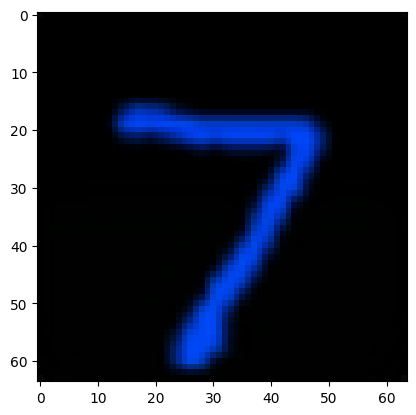

In [45]:
plt.imshow(tensor_to_image(x_pred[0]))

In [ ]:
x = torch.randn(8, 3, 64, 64).to(device)
t = torch.rand(8).to(device)
y = model(x, t)
print(y.shape)

torch.Size([8, 3, 64, 64])


In [49]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

In [50]:
batch = next(iter(dataloader))

In [53]:
from bridge_matching.bridge import BrownianBridge
from bridge_matching.sampler import sample_euler
from bridge_matching.transform import InpaintingTransform
from torchvision.utils import make_grid
from bridge_matching.utils import tensor_to_image

In [8]:
from bridge_matching.sampler.timesteps import get_timesteps_diff, get_timesteps_uniform

In [69]:
sampling_params = {
    "num_steps": 20,
    "vis_steps": 20,
    "timesteps": "uniform",
}

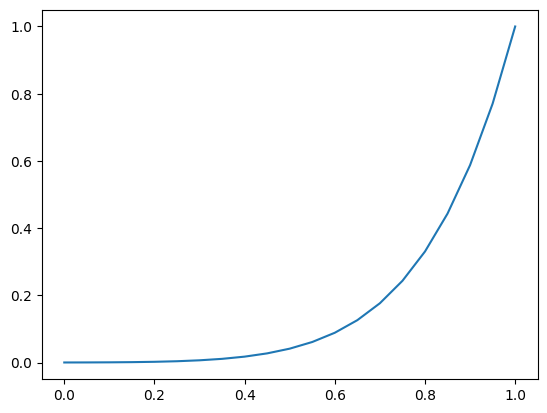

In [17]:
plt.plot(torch.linspace(0, 1, 21), get_timesteps_diff(sampling_params, device).cpu())

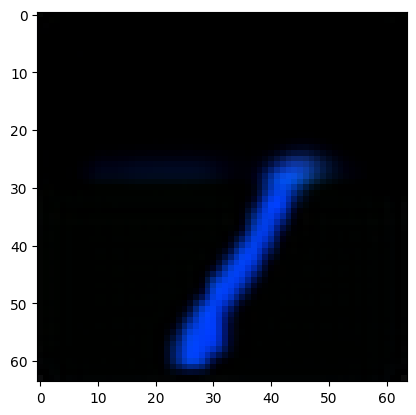

In [ ]:
t = 0.1
x_t = x_orig * t + x_trans * (1 - t)
x_pred = model(x_t, t * torch.ones(x_t.shape[0]).cuda())

plt.imshow(tensor_to_image(x_pred[0]))

tensor(0.0100, device='cuda:0') tensor(0.0595, device='cuda:0') tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100], device='cuda:0')


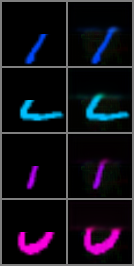

In [89]:
bridge = BrownianBridge(gamma=0.01)
x_orig = batch.to(device)
x_trans = InpaintingTransform()(x_orig)
x_pred, trajectory = sample_euler(bridge, model, x_trans, sampling_params, save_history=True)

trajectory_len = len(trajectory)
trajectory = torch.stack(trajectory, dim=0)
n_pictures_sampling = 4
trajectory = trajectory[:, :n_pictures_sampling, ...]
trajectory = trajectory.permute(1, 0, 2, 3, 4).reshape(-1, *trajectory.shape[-3:])
trajectory_grid = make_grid(trajectory, nrow=trajectory_len)

tensor_to_image(trajectory_grid)

In [21]:
t = torch.linspace(0, 1, 1000)
beta_max = 1e-4

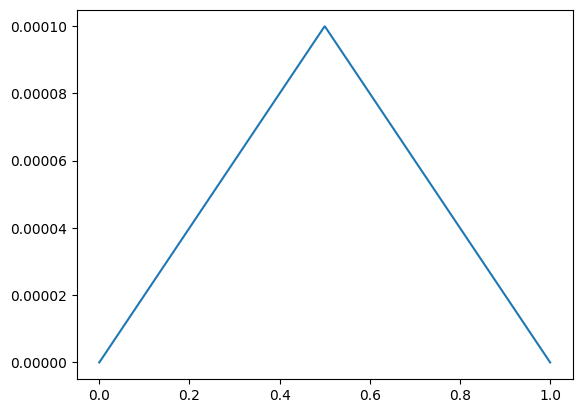

In [24]:
beta_t = 2 * beta_max * torch.min(t, (1 - t))
plt.plot(t, beta_t)
plt.show()

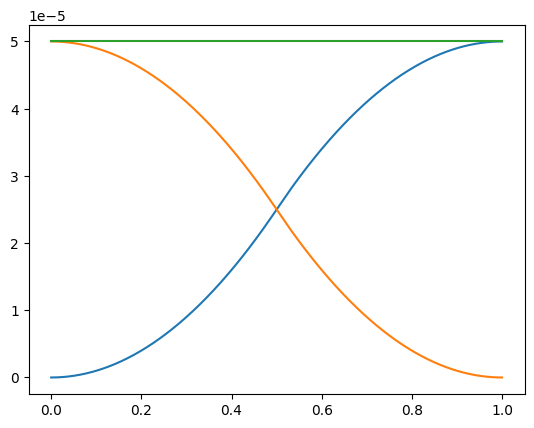

In [37]:
sigma2_t = torch.empty_like(t)
sigma2_t[t <= 0.5] = beta_max * (t ** 2)[t <= 0.5]
sigma2_t[t >= 0.5] = beta_max * (0.5 - (1 - t) ** 2)[t >= 0.5]

s2_t = torch.empty_like(t)
s2_t[t <= 0.5] = beta_max * (0.5 - t**2)[t <= 0.5]
s2_t[t >= 0.5] = beta_max * ((1 - t) ** 2)[t >= 0.5]

plt.plot(t, sigma2_t)
plt.plot(t, s2_t)
plt.plot(t, sigma2_t + s2_t)
plt.show()

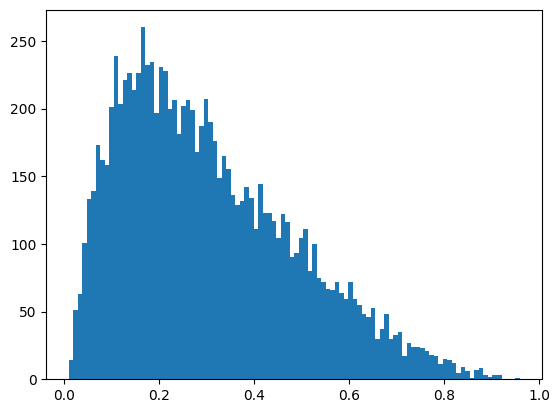

In [24]:
plt.hist(torch.sigmoid(-1 + torch.randn(10000)), bins=100);

In [38]:
from bridge_matching.sampler.timesteps import get_timesteps_diff

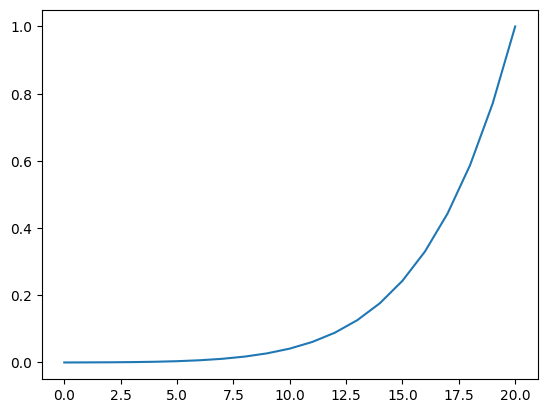

In [66]:
sampling_params = {
    "num_steps": 20,
    "vis_steps": 10,
    "rho": 7,
    "sigma_max": 1,
    "sigma_min": 1e-4,
}
device = "cuda:0"
timesteps = get_timesteps_diff(sampling_params, device)
plt.plot(timesteps.cpu())